**Logistic Regression**

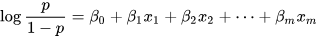 

log(p / 1-p) = B1x1 + B2x2 + ... + b

In [62]:
import sklearn.linear_model as lm
import sklearn.ensemble as se
import sklearn.tree as tree
from sklearn import svm
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
from sklearn import preprocessing

y = df.smoker
X = df.drop(columns=['smoker'])
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,1.0,0.0,0.0


In [61]:
# XGBoost needs the label in the format of [0, 1, 2, 3, ..., n - 1]. It can't handle categorical values
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit(y).transform(y) # This line converts the y from ['yes', 'no', 'no'] to [1, 0, 0], much like dummy coding
# Now we have to resplit the data with these encoded y values:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)

In [72]:
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn import metrics

model_logistic = lm.LogisticRegression(max_iter=1000).fit(X_train, y_train)
pd.DataFrame({'Coefficients on smoking':model_logistic.coef_[0]}, index=X_train.columns)  # code in the book did not work!!

,Coefficients on smoking
age,-1.646506
bmi,-2.692462
children,-0.225457
charges,9.949762
sex_male,0.243173
region_northwest,-0.130399
region_southeast,0.105588
region_southwest,-0.042685


Another version

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)

#Print model parameters - the names and coefficients are in same order
print(model.coef_)
print(X_train.columns)

[[-1.64650584 -2.69246225 -0.2254573   9.94976224  0.24317274 -0.13039912
   0.10558832 -0.04268499]]
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [70]:
pd.DataFrame({'Coefficients on smoking':model.coef_[0]}, index=X_train.columns)

,Coefficients on smoking
age,-1.646506
bmi,-2.692462
children,-0.225457
charges,9.949762
sex_male,0.243173
region_northwest,-0.130399
region_southeast,0.105588
region_southwest,-0.042685
